In [1]:
import numpy as np 
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [2]:
xl = pd.ExcelFile(r"C:\Users\shyam\Desktop\project\Windspeed.xls")
xl.sheet_names
df = xl.parse("Daily")
df.head(100)

,Date,Windspeed
0,1987-01-01,4.27
1,1987-01-02,3.81
2,1987-01-03,4.23
3,1987-01-04,4.12
4,1987-01-05,4.67
...,...,...
95,1987-04-06,3.74
96,1987-04-07,4.38
97,1987-04-08,5.71
98,1987-04-09,5.98


In [3]:
df.index = np.arange(1, len(df) + 1)
df.columns = ['Date','Windspeed']
df.head()

,Date,Windspeed
1,1987-01-01,4.27
2,1987-01-02,3.81
3,1987-01-03,4.23
4,1987-01-04,4.12
5,1987-01-05,4.67


In [4]:
df.describe()

,Windspeed
count,8036.000000
mean,3.311975
std,1.140796
min,0.000000
25%,2.500000
50%,3.230000
75%,4.050000
max,8.430000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8036 entries, 1 to 8036
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8036 non-null   datetime64[ns]
 1   Windspeed  8036 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 188.3 KB


In [6]:
df['Month'] = df['Date'].dt.strftime('%b')
df.head()

,Date,Windspeed,Month
1,1987-01-01,4.27,Jan
2,1987-01-02,3.81,Jan
3,1987-01-03,4.23,Jan
4,1987-01-04,4.12,Jan
5,1987-01-05,4.67,Jan


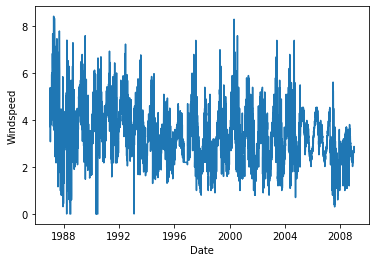

In [7]:
x = df.Date
y = df.Windspeed
sns.lineplot(x = x, y = y, data = df)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [8]:
df.isnull().sum()

Date         0
Windspeed    0
Month        0
dtype: int64

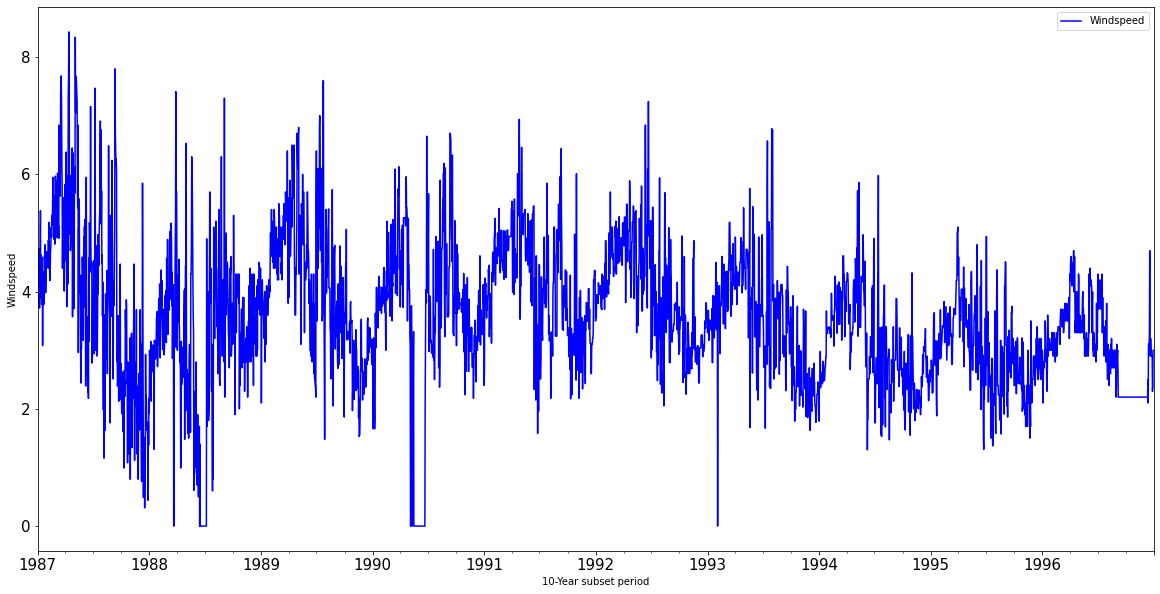

In [9]:
df1=df.copy()
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace=True)
df1 = df1['1987-01-01':'1996-12-31']

curve = df1.plot(color='blue', fontsize=15)
plt.xlabel('10-Year subset period')
plt.ylabel('Windspeed')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

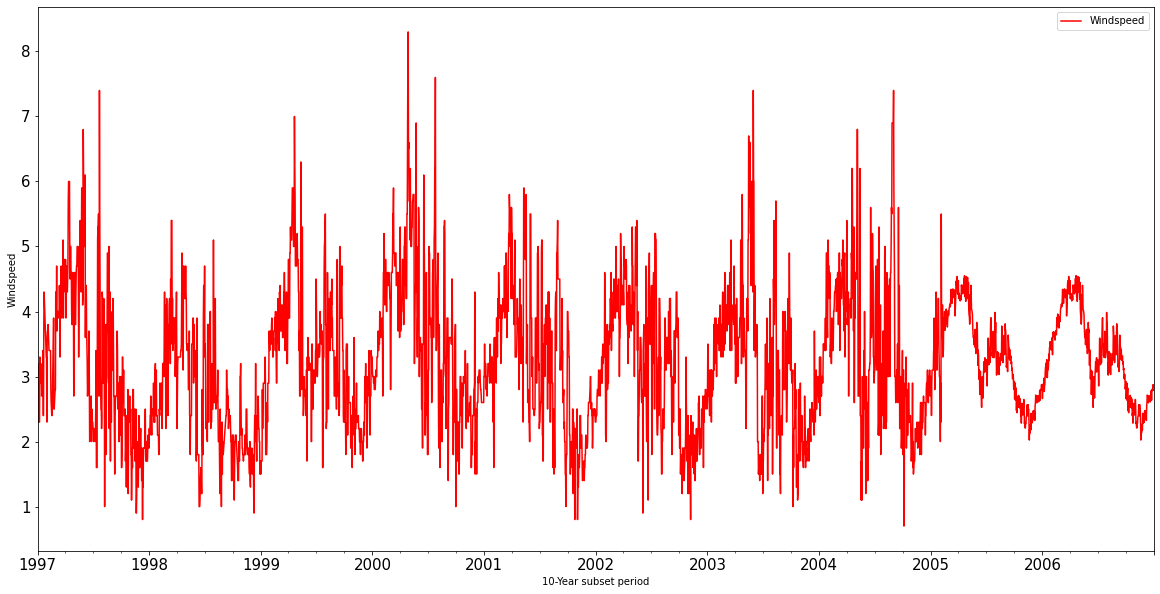

In [10]:
df2=df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date',inplace=True)
df2 = df2['1997-01-01':'2006-12-31']
curve = df2.plot(color='red', fontsize=15)
plt.xlabel('10-Year subset period')
plt.ylabel('Windspeed')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [11]:
# Checking for monthly time scale
df4=df
df4['Month_Year'] = df['Date'].dt.strftime('%y-%b')
df4=df.groupby(df.Month_Year,sort=False)['Windspeed'].mean()
df4.head(12)

Month_Year
87-Jan    4.306452
87-Feb    4.998571
87-Mar    5.655484
87-Apr    5.527000
87-May    5.118065
87-Jun    4.057333
87-Jul    4.603226
87-Aug    3.585161
87-Sep    4.095000
87-Oct    2.338065
87-Nov    2.321333
87-Dec    2.021290
Name: Windspeed, dtype: float64

Text(0, 0.5, 'monthly average')

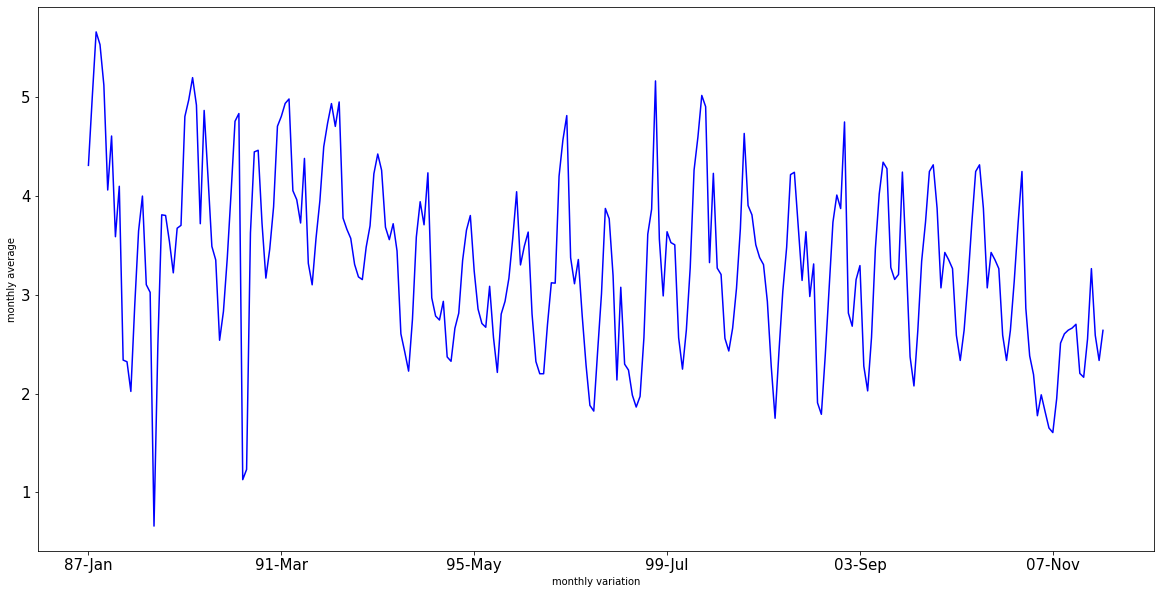

In [12]:
curve = df4.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('monthly variation')
plt.ylabel('monthly average')

In [13]:
# Checking for Annual time scale
df['Year']=df['Date'].dt.strftime('%y')
df.head()

,Date,Windspeed,Month,Month_Year,Year
1,1987-01-01,4.27,Jan,87-Jan,87
2,1987-01-02,3.81,Jan,87-Jan,87
3,1987-01-03,4.23,Jan,87-Jan,87
4,1987-01-04,4.12,Jan,87-Jan,87
5,1987-01-05,4.67,Jan,87-Jan,87


In [14]:
df5 = df.groupby(df.Year,sort=False)['Windspeed'].mean()
df5.head(10)

Year
87    4.045041
88    3.155027
89    4.042959
90    3.516027
91    4.111589
92    4.028934
93    3.474685
94    3.079452
95    2.975918
96    3.028962
Name: Windspeed, dtype: float64

Text(0, 0.5, 'Annual average')

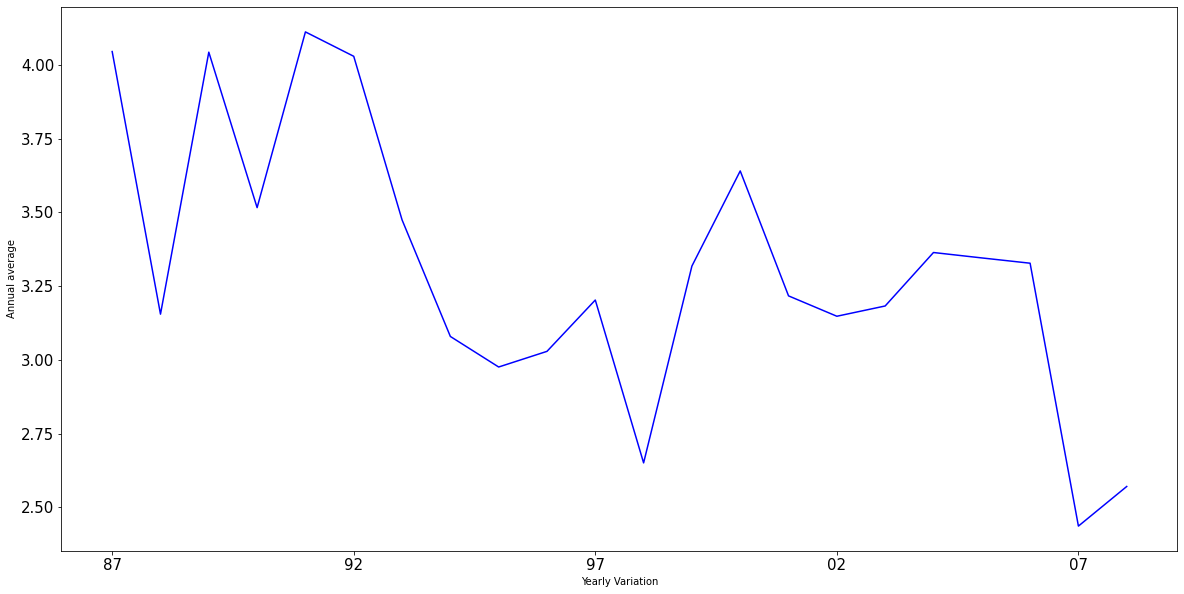

In [15]:
curve = df5.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Yearly Variation')
plt.ylabel('Annual average')

In [16]:
#Monsoon season consists of June, July, August and Septemeber
def season_categoriser(x):
    if x.month==6 or x.month==7 or x.month==8 or x.month ==9:
        x='Monsoon only'+' '+str(x.year)
    else:
        x='Non-Monsoon'+' '+str(x.year)
    return x

In [17]:
df6=df
df6['Season'] = df['Date'].apply(season_categoriser)
df6.head(180)

,Date,Windspeed,Month,Month_Year,Year,Season
1,1987-01-01,4.27,Jan,87-Jan,87,Non-Monsoon 1987
2,1987-01-02,3.81,Jan,87-Jan,87,Non-Monsoon 1987
3,1987-01-03,4.23,Jan,87-Jan,87,Non-Monsoon 1987
4,1987-01-04,4.12,Jan,87-Jan,87,Non-Monsoon 1987
5,1987-01-05,4.67,Jan,87-Jan,87,Non-Monsoon 1987
...,...,...,...,...,...,...
176,1987-06-25,4.33,Jun,87-Jun,87,Monsoon only 1987
177,1987-06-26,4.51,Jun,87-Jun,87,Monsoon only 1987
178,1987-06-27,4.47,Jun,87-Jun,87,Monsoon only 1987
179,1987-06-28,2.78,Jun,87-Jun,87,Monsoon only 1987


In [18]:
df7 = df6[df6['Season'].str.contains('Non-Monsoon')]
df8 = df6[df6['Season'].str.contains('Monsoon only')]

In [19]:
df7 = df.groupby(df.Season,sort=False)['Windspeed'].mean()
df7.head(10)

Season
Non-Monsoon 1987     4.024815
Monsoon only 1987    4.085328
Non-Monsoon 1988     3.384180
Monsoon only 1988    2.696721
Non-Monsoon 1989     4.028971
Monsoon only 1989    4.070820
Non-Monsoon 1990     3.549712
Monsoon only 1990    3.448934
Non-Monsoon 1991     4.155226
Monsoon only 1991    4.024672
Name: Windspeed, dtype: float64

In [20]:
df8 = df.groupby(df.Season,sort=False)['Windspeed'].mean()
df8.head(10)

Season
Non-Monsoon 1987     4.024815
Monsoon only 1987    4.085328
Non-Monsoon 1988     3.384180
Monsoon only 1988    2.696721
Non-Monsoon 1989     4.028971
Monsoon only 1989    4.070820
Non-Monsoon 1990     3.549712
Monsoon only 1990    3.448934
Non-Monsoon 1991     4.155226
Monsoon only 1991    4.024672
Name: Windspeed, dtype: float64

Text(0, 0.5, 'Seasonal Average')

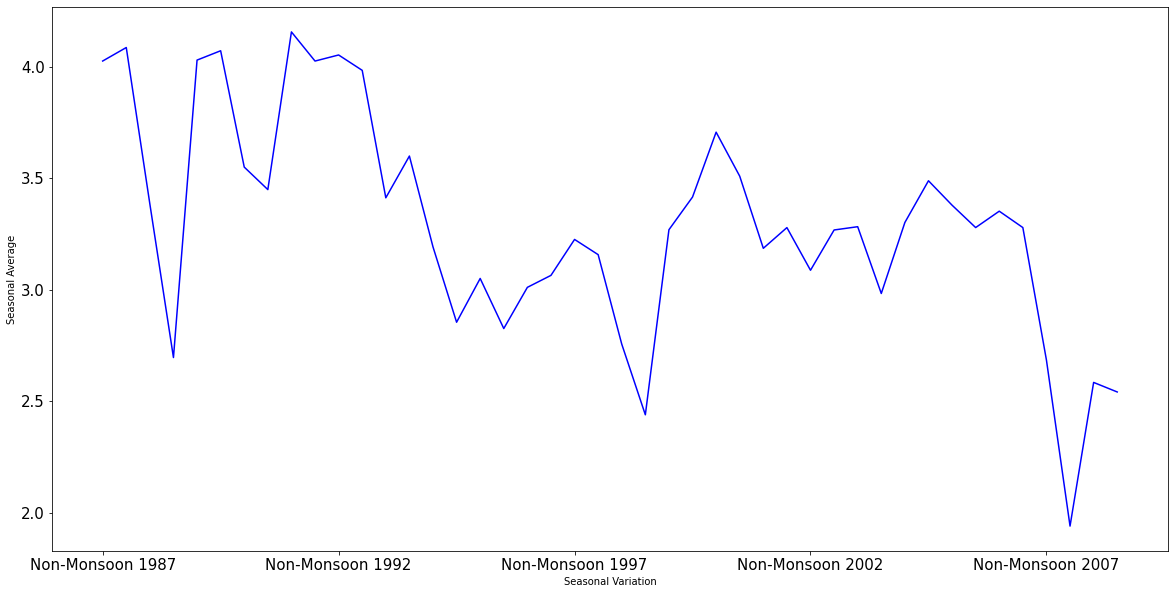

In [21]:
curve = df7.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Seasonal Variation')
plt.ylabel('Seasonal Average')

Text(0, 0.5, 'Seasonal Average')

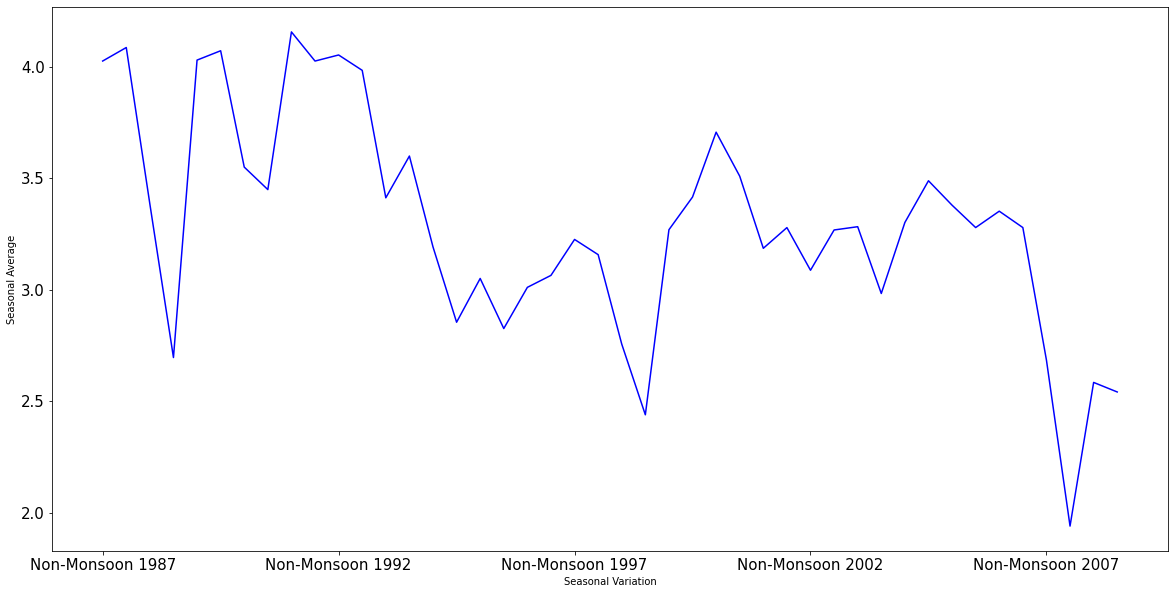

In [22]:
curve = df8.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Seasonal Variation')
plt.ylabel('Seasonal Average')

In [23]:
#Mann-Kendall test for trend analysis
import pip
pip.main(['install','pymannkendall'])
import pymannkendall as mk

stat1= mk.original_test(df['Windspeed'])
print(stat1)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-24.986296899729485, Tau=-0.18584592730348776, s=-5999967.0, var_s=57662542325.666664, slope=-0.00013458963168492345, intercept=3.77071384529418)


In [24]:
df4= pd.DataFrame(df4)
stat2= mk.original_test(df4['Windspeed'])
print(stat2)

Mann_Kendall_Test(trend='decreasing', h=True, p=1.0165825736763168e-08, z=-5.727938746632118, Tau=-0.23660559972347045, s=-8214.0, var_s=2055923.3333333333, slope=-0.0041698572086458965, intercept=3.8526910616466132)


In [25]:
df5 = pd.DataFrame(df5)
stat3 = mk.original_test(df5['Windspeed'])
print(stat3)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.02784675596413333, z=-2.1994385231512275, Tau=-0.341991341991342, s=-79.0, var_s=1257.6666666666667, slope=-0.03816473132969034, intercept=3.6682639255370915)


In [26]:
df7 = pd.DataFrame(df7)
stat4 = mk.seasonal_test(df7['Windspeed'])
print(stat4)

Seasonal_Mann_Kendall_Test(trend='decreasing', h=True, p=0.003219732690921795, z=-2.945941518185897, Tau=-0.4666666666666667, s=-28.0, var_s=84.00000000000001, slope=-0.23914145247250895, intercept=3.707340975225497)


In [27]:
df8 = pd.DataFrame(df8)
stat4 = mk.seasonal_test(df8['Windspeed'])
print(stat4)

Seasonal_Mann_Kendall_Test(trend='decreasing', h=True, p=0.003219732690921795, z=-2.945941518185897, Tau=-0.4666666666666667, s=-28.0, var_s=84.00000000000001, slope=-0.23914145247250895, intercept=3.707340975225497)


In [28]:
#Sen-slope estimator for trend analysis
stat5= mk.sens_slope(df['Windspeed'])
print(stat5)

Sens_Slope_Test(slope=-0.00013458963168492345, intercept=3.77071384529418)


In [29]:
stat6= mk.sens_slope(df4['Windspeed'])
print(stat6)

Sens_Slope_Test(slope=-0.0041698572086458965, intercept=3.8526910616466132)


In [30]:
stat7= mk.sens_slope(df5['Windspeed'])
print(stat7)

Sens_Slope_Test(slope=-0.03816473132969034, intercept=3.6682639255370915)


In [31]:
stat8= mk.sens_slope(df7['Windspeed'])
print(stat8)

Sens_Slope_Test(slope=-0.02081674473067904, intercept=3.7264392179218513)


In [32]:
stat8= mk.sens_slope(df8['Windspeed'])
print(stat8)

Sens_Slope_Test(slope=-0.02081674473067904, intercept=3.7264392179218513)


In [33]:
# Change point analysis using Petit's test
import pip
pip.main(['install','pyhomogeneity'])
import pyhomogeneity as hg
stat9 = hg.pettitt_test(df['Windspeed'])
df['Windspeed'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Windspeed_daily.xls', index=False)
print(stat9)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Pettitt_Test(h=True, cp=2466, p=0.0, U=5502194.0, avg=mean(mu1=3.817834549878345, mu2=3.0880165864090205))


C:\Users\shyam\AppData\Local\Temp/ipykernel_8628/4265033234.py:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df['Windspeed'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Windspeed_daily.xls', index=False)


In [34]:
stat10 = hg.pettitt_test(df4['Windspeed'])
df4['Windspeed'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Windspeed_monthly.xls', index=False)
print(stat10)

Pettitt_Test(h=True, cp=81, p=0.0, U=7365.0, avg=mean(mu1=3.8209708255760035, mu2=3.0902455041829824))


C:\Users\shyam\AppData\Local\Temp/ipykernel_8628/2450497203.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df4['Windspeed'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Windspeed_monthly.xls', index=False)


In [35]:
stat11 = hg.pettitt_test(df5['Windspeed'])
df5['Windspeed'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Windspeed_yearly.xls', index=False)
print(stat11)

Pettitt_Test(h=True, cp=7, p=0.01365, U=85.0, avg=mean(mu1=3.767751874070985, mu2=3.0992946242908186))


C:\Users\shyam\AppData\Local\Temp/ipykernel_8628/1206239811.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df5['Windspeed'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Windspeed_yearly.xls', index=False)


In [36]:
stat12 = hg.pettitt_test(df7['Windspeed'])
df7['Windspeed'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Windspeed_non-monsoon.xls', index=False)
print(stat12)

Pettitt_Test(h=True, cp=14, p=5e-05, U=344.0, avg=mean(mu1=3.751121447364617, mu2=3.080041025426899))


C:\Users\shyam\AppData\Local\Temp/ipykernel_8628/4285514392.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df7['Windspeed'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Windspeed_non-monsoon.xls', index=False)


In [37]:
stat12 = hg.pettitt_test(df8['Windspeed'])
df8['Windspeed'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Windspeed_monsoon.xls', index=False)
print(stat12)

Pettitt_Test(h=True, cp=14, p=0.0001, U=344.0, avg=mean(mu1=3.751121447364617, mu2=3.080041025426899))


C:\Users\shyam\AppData\Local\Temp/ipykernel_8628/1419367844.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df8['Windspeed'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Windspeed_monsoon.xls', index=False)
